<a href="https://colab.research.google.com/github/dhiyasalmas/Cylinder-Pellets-Distribution-Temperature/blob/main/Tugas2_Termodinamika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

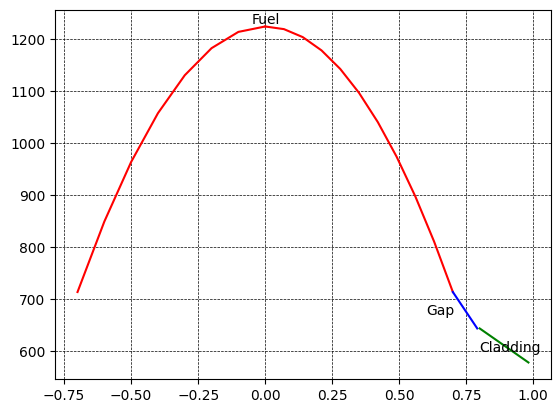

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

'''
    Tugas 2, Termodinamika Reaktor Nuklir
    Dhiya Salma Salsabila/24923304
'''

#Array Jari-Jari
r = np.arange(0, 0.77, 0.07) #Fuel (cm)
rr = np.arange(-0.7, 0, 0.1) #Fuel (cm)
tg = np.arange(0, 0.101, 0.01) #Ketebalan Gap (cm)
tc = np.arange(0, 0.202, 0.02) #Ketebalan Cladding (cm)

#Konstanta Konduktivitas
kf = 0.024 #Uranium dioxide (W/cm.K)
kg = 0.05 #Helium (W/cm.K)
kc = 0.107 #SS (W/cm.K)
tb = 300+273.15 #Temperature coolant (K)

#Jari jari dan ketebalan
rf = 0.7 #jari jari fuel (cm)
tggf = 0.1 #ketebalan gap (cm)
tccf = 0.2 #Ketebalan cladding (cm)

#Parameter
qv = 100 #volumetric heat rate (W/cc)
hs = 4.5 #heat trans coef of clad cool (W/cm^2.K)

#Mengitung Coolant
def coolant():
    global tcoolant
    tcoolant = round(tb + (qv*rf**2)/(2*(rf+tggf+tccf)*hs), 2)
    return tcoolant

#Menghitung Cladding
def cladding(radius, thickness_clad):
  global tclad
  tclad = []
  for i in range (len(thickness_clad)):
    if i == 0:
      tcc = tcoolant + ((qv*rf)/2)*(thickness_clad[-1]/kc)
    else:
      tcc = tclad[0] - (qv*radius[-1])/2*(thickness_clad[i]/kc)
    tclad.append(tcc)
    i += 1
  tclad = np.round(tclad, decimals=2)
  return tclad


#Menghitung temperatur pada gap
def gap(radius, thickness_gap):
    global tgap
    tgap = []
    for i in range (len(thickness_gap)):
        if i == 0:
            #tgg = tclad[0] + (qv*rf/2)*(tg[-1]/kg)
            tgg = tclad[0] + (qv*radius[-1]/2)*(thickness_gap[-1]/kg)
        else:
            tgg = tgap[0] - (qv*radius[-1]/2)*(thickness_gap[i]/kg)
        tgap.append(tgg)
        i += 1
    return tgap


#Menghitung fuel 0 sampai 0.7
def fuel(radius):
    global tfuel
    tfuel = []
    for i in range (len(radius)):
        if i == 0:
            tr = tgap[0] + ((qv*radius[-1]**2)/(4*kf))
        else:
            tr = round(tfuel[0] - ((qv*radius[i]**2)/(4*kf)),2)
        tfuel.append(tr)
        i += 1
    return tfuel


#Menghitung fuel -0.7 sampai -0.1
rr = np.append(rr, 0)
def fueld(radius):
    global tfueld
    tfueld = []
    for i in range (len(radius)):
        tr = tfuel[0] - ((qv*radius[i]**2)/(4*kf))
        tfueld.append(tr)
    return tfueld


#Running All Function
coolant()
cladding(r, tc)
gap(r, tg)
fuel(r)
fueld(rr)

#Plot Grafik
x1 = rr
y1 = tfueld
x2 = r
y2 = tfuel
x3 = np.arange(0.7, 0.8, (0.8-0.7)/11)
y3 = tgap
x4 = np.arange(0.8, 1, (1-0.8)/11)
y4 = tclad
fig, ax = plt.subplots()
ax.plot(x1, y1, 'r', label='Fuel')
ax.plot(x2, y2, 'r', label='Fuel')
ax.plot(x3, y3, 'b', label='Gap')
ax.plot(x4, y4, 'g', label='Cladding')
plt.text(-0.05,1230, "Fuel")
plt.text(0.6,670, "Gap")
plt.text(0.8,600, "Cladding")
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.show()